In [20]:
import torch # PyTorch 的核心模块
import torch.nn as nn # PyTorch 的神经网络模块
import torch.optim as optim # PyTorch 的优化器模块
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl # 设置中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [21]:
# 1. 生成合成数据
# 模拟真实关系 y = 2*x + 1 + noise
true_w = 2.0
true_b = 1.0
num_samples = 200

In [22]:
# 生成 x 值
X = np.random.rand(num_samples, 1) * 10  # 生成 0 到 10 之间的随机 x 值
# 生成 y 值，加入噪声
y = true_w * X + true_b + np.random.randn(num_samples, 1) # 加入标准正态分布噪声

In [23]:
# 将 NumPy 数组转换为 PyTorch 张量
# 需要指定数据类型为 float，因为神经网络通常处理浮点数
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [24]:
# 2. 定义线性模型
# nn.Linear(input_features, output_features)
# 这里的输入特征是 x (维度为 1)，输出特征是 y (维度为 1)
model = nn.Linear(1, 1)

In [25]:
# 3. 定义损失函数
# 使用均方误差损失
criterion = nn.MSELoss()

In [26]:
# 4. 定义优化器
# 使用随机梯度下降 (SGD)
# model.parameters() 获取模型中所有需要优化的参数 (权重 w 和偏置 b)
# lr 是学习率
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [27]:
# 5. 训练模型
num_epochs = 1000 # 训练的轮数

print("开始训练...")
for epoch in range(num_epochs):
    # 前向传播：计算预测值
    y_predicted = model(X_tensor)

    # 计算损失
    loss = criterion(y_predicted, y_tensor)

    # 反向传播：计算梯度
    # 在进行新的反向传播之前，需要将之前的梯度清零，否则梯度会累加
    optimizer.zero_grad()
    loss.backward() # 计算损失相对于模型参数 (w 和 b) 的梯度

    # 参数更新：根据梯度和学习率更新参数
    optimizer.step() # 执行一步梯度下降

    # 每隔一定轮数打印一次损失，观察训练进度
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("训练结束。")

开始训练...
Epoch [100/1000], Loss: 1.2843
Epoch [200/1000], Loss: 1.1997
Epoch [300/1000], Loss: 1.1649
Epoch [400/1000], Loss: 1.1506
Epoch [500/1000], Loss: 1.1447
Epoch [600/1000], Loss: 1.1423
Epoch [700/1000], Loss: 1.1413
Epoch [800/1000], Loss: 1.1409
Epoch [900/1000], Loss: 1.1407
Epoch [1000/1000], Loss: 1.1406
训练结束。


In [28]:
# 6. 查看训练后的模型参数和可视化结果
# 从模型中获取学习到的权重和偏置
learned_w = model.weight.data.item()
learned_b = model.bias.data.item()

print(f"\n真实参数: w = {true_w}, b = {true_b}")
print(f"学习到的参数: w = {learned_w:.4f}, b = {learned_b:.4f}")


真实参数: w = 2.0, b = 1.0
学习到的参数: w = 2.0513, b = 0.6583


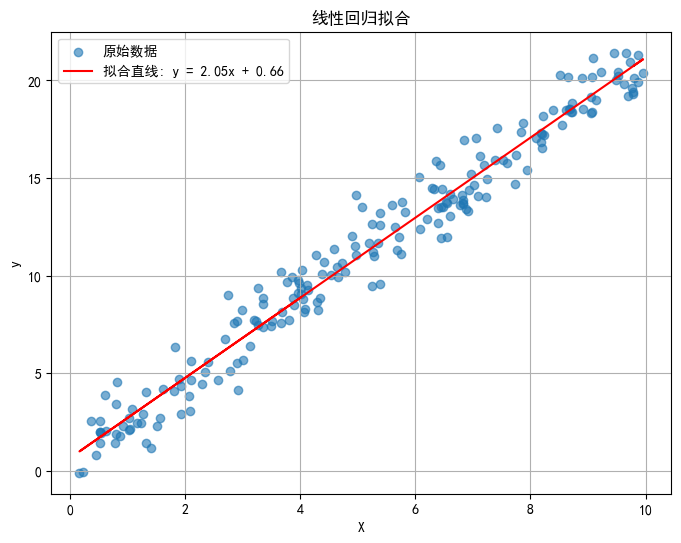

In [29]:
# 可视化
predicted_y = model(X_tensor).data.numpy() # 使用训练好的模型进行预测

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='原始数据', alpha=0.6)
plt.plot(X, predicted_y, color='red', label=f'拟合直线: y = {learned_w:.2f}x + {learned_b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('线性回归拟合')
plt.legend()
plt.grid(True)
plt.show()